# Curvilinear grid generation with defined extension

This is a brief introduction to the process of generating curvilinear grid with a defined extension.

At the very beginning, the necessary libraries have to be imported.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from meshkernel import GeometryList, GriddedSamples, MakeGridParameters, MeshKernel, MeshRefinementParameters, RefinementType

## Create a curvilinear grid in a spherical system

The grid will extend from the origin to the upper right corner, automatically computing the number of rows and columns while adjusting the latitude to preserve an aspect ratio close to one in real-world distances.

In [2]:
lon_min,lon_max = -1,-0.2
lat_min,lat_max = 49.1,49.6
lon_res,lat_res = 0.1,0.1

make_grid_parameters = MakeGridParameters()
make_grid_parameters.origin_x = lon_min
make_grid_parameters.origin_y = lat_min
make_grid_parameters.upper_right_x = lon_max
make_grid_parameters.upper_right_y = lat_max
make_grid_parameters.block_size_x = lon_res
make_grid_parameters.block_size_y = lat_res

mk = MeshKernel(is_geographic=True)
mk.curvilinear_make_uniform_on_extension(make_grid_parameters)

Convert the curvilinear mesh to an unstructured mesh

In [3]:
mk.curvilinear_convert_to_mesh2d() 

Plot the mesh

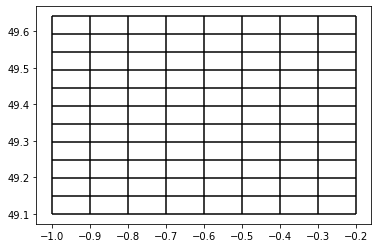

In [4]:
mesh2d = mk.mesh2d_get()
fig, ax = plt.subplots()
mesh2d.plot_edges(ax, color="black")

## Create a curvilinear grid in a cartesian system

In the cartesian case no adjustment of the y coordinate is required

In [5]:
min_x,min_y = 0,0
max_x,max_y = 10.0,10.0
block_size_x,block_size_y =1,2

make_grid_parameters = MakeGridParameters()
make_grid_parameters.origin_x = min_x
make_grid_parameters.origin_y = min_y
make_grid_parameters.upper_right_x = max_x
make_grid_parameters.upper_right_y = max_y
make_grid_parameters.block_size_x = block_size_x
make_grid_parameters.block_size_y = block_size_y

mk = MeshKernel(is_geographic=False)
mk.curvilinear_make_uniform_on_extension(make_grid_parameters)

Convert the curvilinear mesh to an unstructured mesh

In [6]:
mk.curvilinear_convert_to_mesh2d() 

Plot the mesh

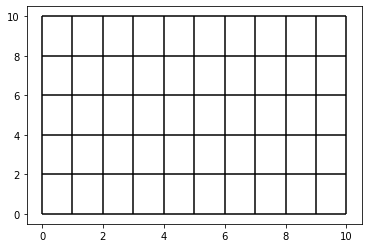

In [7]:
mesh2d = mk.mesh2d_get()
fig, ax = plt.subplots()
mesh2d.plot_edges(ax, color="black")